
# **Qiskit** - providers


Nos permite simular circuitos com medições no meio da portas lógicas

In [1]:
!pip install qiskit[visualization]
# Instalação do Qiskit e pacotes adicionais de visualização

!pip install qiskit-aer
# Instalação do Qiskit Aer, que fornece simuladores de alto desempenho para circuitos quânticos

!pip install qiskit-ibm-runtime
# Instalação do Qiskit IBM Quantum Runtime, permitindo acesso a recursos de computação quântica em nuvem

In [2]:
from qiskit import QuantumCircuit
from qiskit.providers.basic_provider import BasicSimulator

#qiskit.providers: é o pacote que contém provedores de execução de circuitos quânticos, como simuladores e computadores quânticos reais.
#basic_provider: é um submódulo que contém implementações básicas de provedores de simulação.
#BasicSimulator: é uma classe que representa um simulador básico para executar circuitos quânticos em um ambiente simulado.

simulator_basic = BasicSimulator()
# Cria um objeto de simulador básico para simulação quântica.

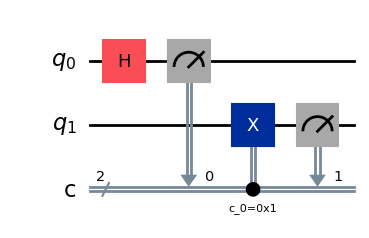

In [3]:
qc = QuantumCircuit(2,2)
# Cria um circuito quântico com 2 qubits e 2 bits clássicos. Aqui, `qc` é uma instância de QuantumCircuit com dois qubits e dois bits clássicos.

qc.h(0)
qc.measure(0,0)
qc.x(1).c_if(0,1)
qc.measure(1,1)
qc.draw('mpl')

In [4]:
job = simulator_basic.run(qc, shots = 1024) #run method
result = job.result()
print(result)

Result(backend_name='basic_simulator', backend_version='0.1', qobj_id='cd836dfe-4cc6-40a9-8806-acb88bfb446c', job_id='aadd1158-d838-4bee-8617-bd1c14d883f9', success=True, results=[ExperimentResult(shots=1024, success=True, meas_level=2, data=ExperimentResultData(counts={'0x3': 489, '0x0': 535}), header=QobjExperimentHeader(qubit_labels=[['q', 0], ['q', 1]], n_qubits=2, qreg_sizes=[['q', 2]], clbit_labels=[['c', 0], ['c', 1]], memory_slots=2, creg_sizes=[['c', 2]], name='circuit-160', global_phase=0.0, metadata={}), status=DONE, name='circuit-160', seed_simulator=664493157, time_taken=0.18589520454406738)], date=None, status=COMPLETED, header=QobjHeader(backend_name='basic_simulator', backend_version='0.1'), time_taken=0.18689513206481934)


In [5]:
counts = result.get_counts() #get_count() é um method para extrair essa informação do "result"
print(counts)

{'11': 489, '00': 535}


In [6]:
from qiskit.visualization import plot_histogram, plot_distribution

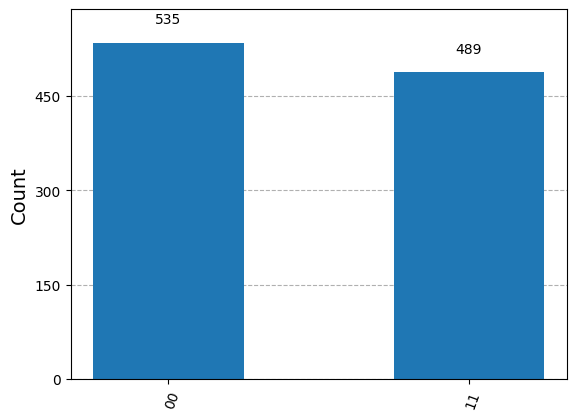

In [7]:
plot_histogram(counts)

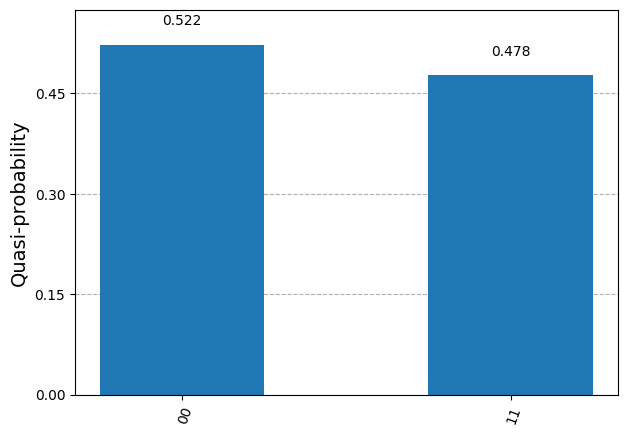

In [8]:
plot_distribution(counts)

In [9]:
job = simulator_basic.run(qc, shots =10, memory = True)
result = job.result()
samples = result.get_memory()
print(samples)

['00', '11', '11', '11', '11', '00', '00', '11', '11', '00']


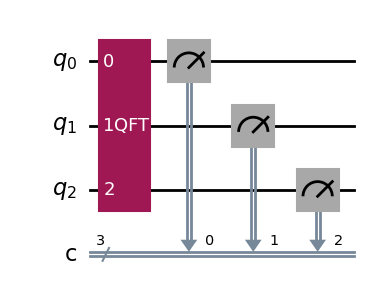

In [10]:
from qiskit.circuit.library import QFT

qc = QuantumCircuit(3,3)
qc.append(QFT(3), range(3))
qc.measure(range(3),range(3))
qc.draw('mpl')

In [11]:
job = simulator_basic.run(qc, shots = 1024)

BasicProviderError: 'basic_simulator encountered unrecognized operation "QFT"'

In [12]:
from qiskit import transpile

qc_t = transpile(qc, backend=simulator_basic)
job = simulator_basic.run(qc_t, shots=1024)

In [13]:
result = job.result()
counts = result.get_counts()
print(counts)

{'101': 135, '010': 141, '100': 139, '011': 115, '111': 104, '110': 119, '000': 130, '001': 141}


# **Resumo:**

**Use o BasicSimulator para fazer:**

* contagens/amostras em circuitos com medições no meio do circuito.

**Não use para:**

* Circuitos muito grandes (muitos qubits, muitos gates). As do quantum_info package não são otimizadas para isso e são construídas utilizando Álgebra Linear. Esses algoritmos não são eficientes para matrizes muito grandes.

* Precisa encontrar estados coerentes na saída do circuito com medição (statevector/density matrix)"


* Precisa incluir ruído